<a href="https://colab.research.google.com/github/BhanuDanda/NLP/blob/main/25-08-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
2  Case29     followed  Elderslie Finance Corp Ltd v Australian Securi...   
3  Case41        cited  Australian Securities and Investments Commissi...   
4  Case42        cited  Australian Securities and Investments Commissi...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  Ordinarily that discretion will be exercised s...  
2                                                NaN  
3  Numerous cases have held that s 911A of the Ac...  
4  Numerous cases have held that s 911A of the Ac...  
DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')

Document counts per type:
 case_outcome
cited            108
referred to       64
followed          17
applie

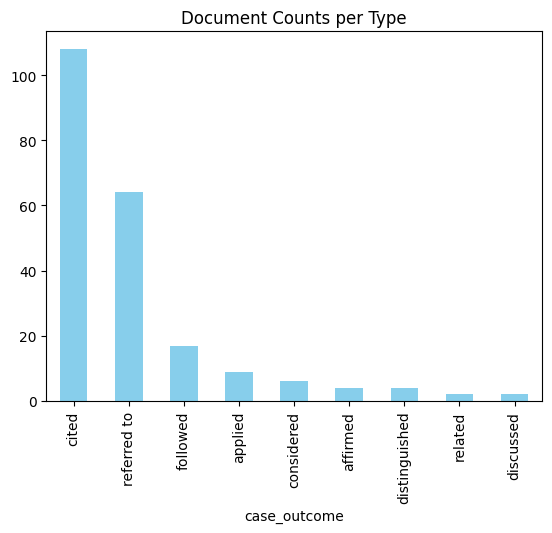

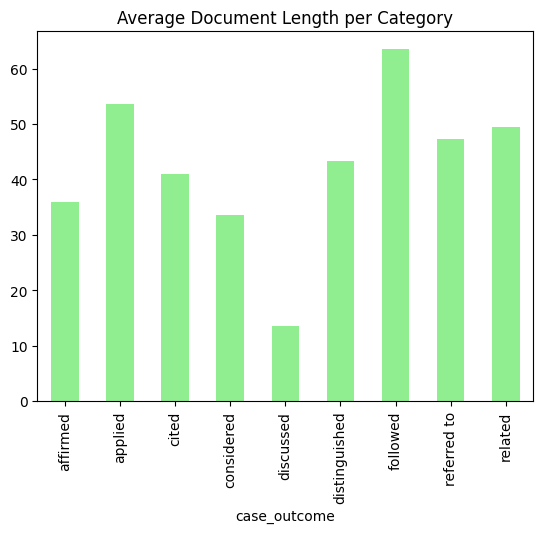

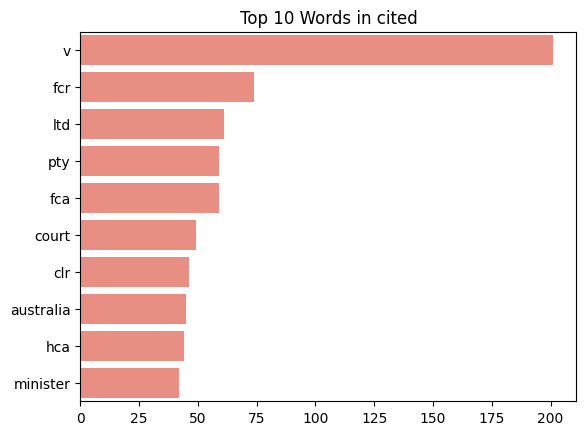

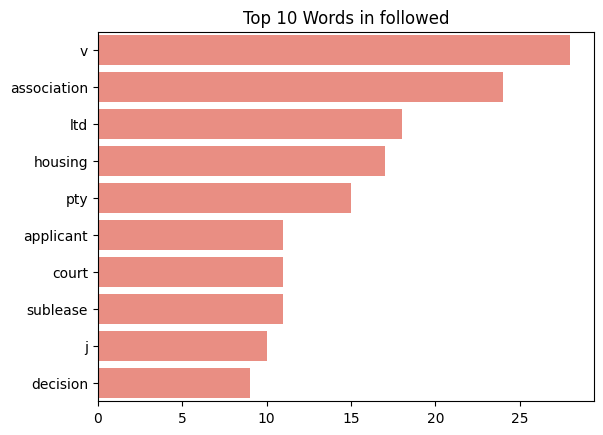

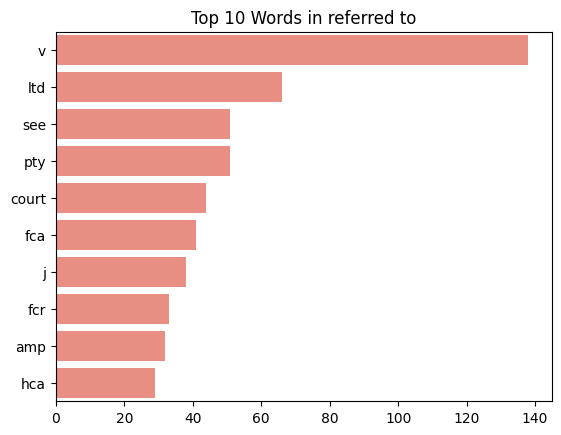

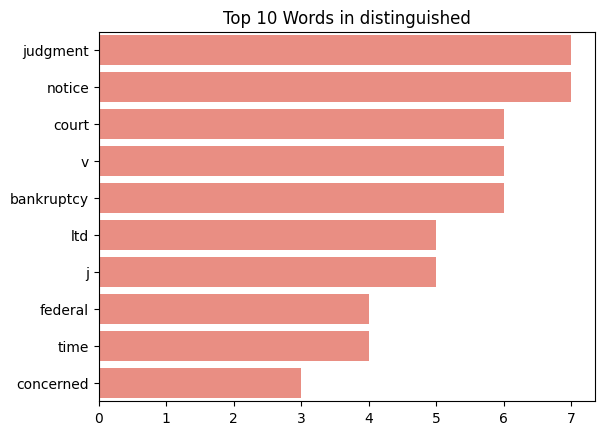

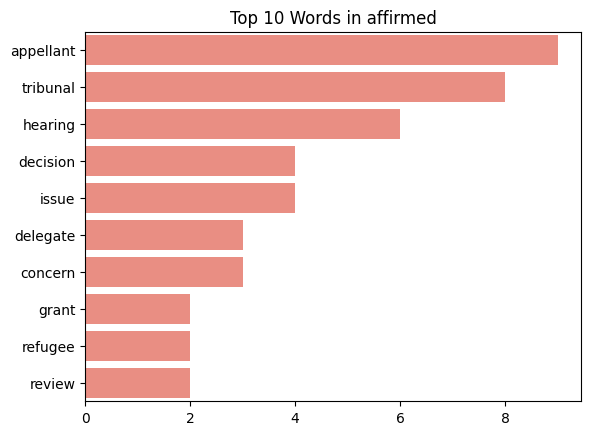

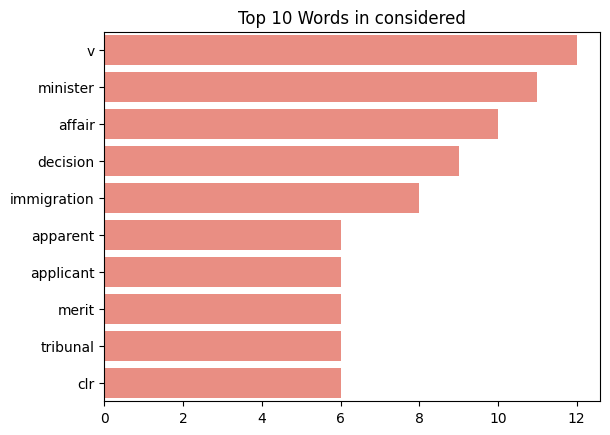

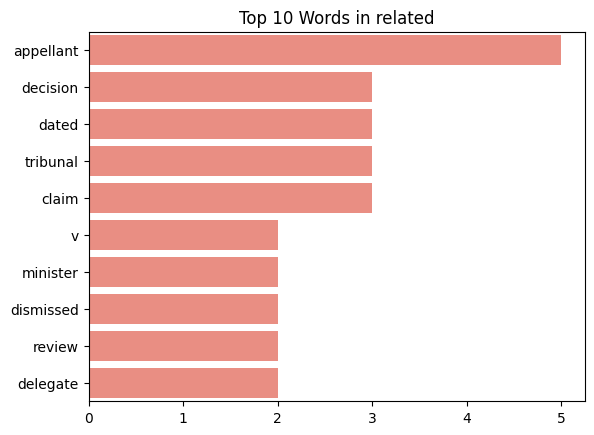

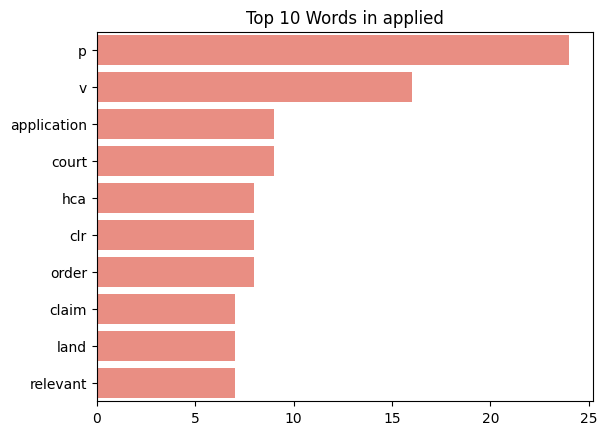

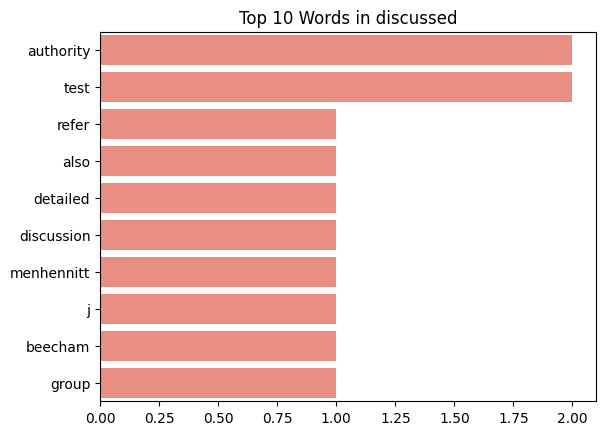

Vocabulary size: 6328

Top 10 Most Common Bigrams:
pty ltd: 115
hca clr: 76
minister immigration: 67
fca fcr: 61
immigration multicultural: 42
indigenous affair: 33
multicultural indigenous: 29
ex parte: 27
clr per: 24
federal court: 22


In [4]:
import pandas as pd, re, nltk, matplotlib.pyplot as plt, seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added this line again
df = pd.read_csv("/content/legal_text_classification[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print(df.head())
print("DataFrame columns:", df.columns)
print("\nDocument counts per type:\n", df['case_outcome'].value_counts())
df['case_outcome'].value_counts().plot(kind='bar', color='skyblue', title='Document Counts per Type')
plt.show()
legal_stop = {'herein','thereof','hereto','hereby','therein','thereafter','whereof','wherein'}
stop_words = set(stopwords.words('english')).union(legal_stop)
lem = WordNetLemmatizer()
def clean(t):
    if not isinstance(t, str):
        return ""
    t = re.sub(r'[^a-z\s]', '', t.lower())
    tokens = [lem.lemmatize(w) for w in nltk.word_tokenize(t) if w not in stop_words]
    return ' '.join(tokens)
df['clean_text'] = df['case_text'].apply(clean)
df['doc_len'] = df['clean_text'].apply(lambda x: len(x.split()))
df.groupby('case_outcome')['doc_len'].mean().plot(kind='bar', color='lightgreen', title='Average Document Length per Category')
plt.show()
for cat in df['case_outcome'].unique():
    words = ' '.join(df[df['case_outcome']==cat]['clean_text']).split()
    freq = dict(Counter(words).most_common(10))
    sns.barplot(x=list(freq.values()), y=list(freq.keys()), color='salmon')
    plt.title(f"Top 10 Words in {cat}")
    plt.show()

cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(df['clean_text'])

vocab = cv.get_feature_names_out()
print("Vocabulary size:", len(vocab))
sum_words = X.sum(axis=0)
words_freq = sorted([(w, sum_words[0, i]) for w, i in cv.vocabulary_.items()], key=lambda x: x[1], reverse=True)
bigrams = [w for w in words_freq if " " in w[0]][:10]
print("\nTop 10 Most Common Bigrams:")
for bg, f in bigrams: print(f"{bg}: {f}")